In [13]:
##importing dependencies and libraries

import numpy as np
from matplotlib import pyplot as plt

In [14]:
##initialising a lattice
## N is my lattice size

def create_lattice(N=8):
  return 2*np.random.randint(2, size=(N, N, N)) - 1 ##returns a 3D array with -1 and 1 filled randomly

In [15]:
##create_lattice(3)  ----------------> you can run this program to check

In [16]:
##calculating lattice energy
## intializing the coupling constant to 1

## we %N for six different cases to include the boundary conditions, considering the lattice having a padding of 0s
def energy(lattice, N):
  J = 1
  E = 0

  for x in range(N):
    for y in range(N):
      for z in range(N):
        E = E - J*lattice[x, y, z]*lattice[(x+1)%N, y, z]
        E = E - J*lattice[x, y, z]*lattice[(x-1)%N, y, z]

        E = E - J*lattice[x, y, z]*lattice[x, (y+1)%N, z]
        E = E - J*lattice[x, y, z]*lattice[x, (y-1)%N, z]

        E = E - J*lattice[x, y, z]*lattice[x, y, (z+1)%N]
        E = E - J*lattice[x, y, z]*lattice[x, y, (z-1)%N]

  return E/2


##time complexity
##operations per iteration: 6
##number of iteration: N**3
##number of addition operations = 6*N**3
##number of matrix multiplication operations = 6*N**3

In [17]:
##calculating delta_E

def delta_E(pos, lattice, N):
  x, y, z = pos
  J = 1

  s = lattice[x, y, z]
  neighbour = lattice[(x+1)%N, y, z] + lattice[(x-1)%N, y, z] + lattice[x, (y+1)%N, z] + lattice[x, (y-1)%N, z] + lattice[x, y, (z+1)%N] + lattice[x, y, (z-1)%N]

  return 2*J*s*neighbour

##number of operations = 2
## number of iterartions = 1
##number of addition operations = 5 
##number of multiplication operations = 1

In [18]:
##changing states of the lattice
##T = temperature
## randomly changing the spin and the conditiond of metropolis algorithm as mentioned in the markdown file

def conf_state(lattice, N, T):
    
  for x in range(N):
    for y in range(N):
      for z in range(N):
        del_E = delta_E([x, y, z], lattice, N)
        if del_E < 0:
          lattice[x, y, z] *= -1
        elif np.random.rand() < np.exp(-del_E/T):
          lattice[x, y, z] *= -1
  
  return lattice

##number of operations = delta_E's #(2) + 1 = 3
##number of iterations = N**3
##number of addition operations = (delta_E # + 0 )*N**3
##number of multiplication operations =(delta_E's # + 0)*N**3

In [19]:
## for each value of temperature array, we append the values of energy and magnetization in their respective arrays. 

def simulate(iters=100, N=8, T=[0.5, 10, 200]):
  temp = np.linspace(T[0], T[1], T[2])

  energy_vs_temp = []
  mag_vs_temp = []

  for t in temp:
    lattice = create_lattice(N);

## the iters refer to the number of sweeps we perform with the lattice.
    for i in range(iters):
      lattice = conf_state(lattice, N, t)
    
    energy_vs_temp.append(energy(lattice, N)/(N**3))
    mag_vs_temp.append(lattice.sum()/(N**3))
  
  return temp, energy_vs_temp, mag_vs_temp


##number of operations = conf_state's # * iters + create_lattice's # * T[2] + energy * T[2] + T[2]
##time complexity == 3*(N**3)*iters + 2*T[2] + 6*(N**3)*T[2]
##number of addition operations = T[2] * (2*5*N**3*iters) + (6*N**3*iters)*T[2]
##number of multiplication operations = T[2] * ((1*2*N**3**iters) + (6*N**3*iters))

In [20]:
T, E, M = simulate()

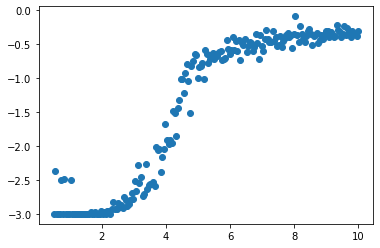

In [21]:
plt.scatter(T, E)

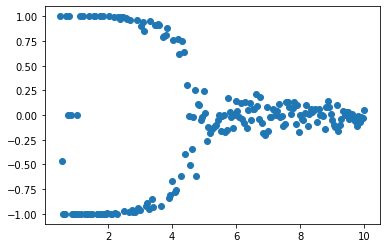

In [22]:
plt.scatter(T, M)

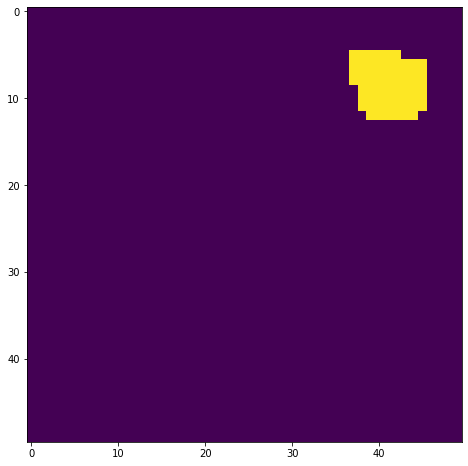

In [23]:
from matplotlib import rc
## runtime configuration - visualizing library

rc("animation", html="jshtml")
from matplotlib.animation import FuncAnimation

fps = 24 ## frames per second
nseconds = 3 ## total runtime

fig = plt.figure(figsize=(8,8))

N = 50
_lattice = create_lattice(N)
##change the slice to visualise any face of the 3D lattice
##X = [X,:,:]
##Y = [:,Y,:]
##Z = [:,:,Z]
im = plt.imshow(_lattice[0,:,:])

def update(frame):
  lattice = conf_state(_lattice, N, 1)
  im.set_array(lattice[0,:,:])

  return [im]

anim = FuncAnimation(fig, update, frames=fps*nseconds, interval=1000/fps, blit=False)
anim

In [24]:
# ----end---- #